# Effect of COVID-19 on prescribing of Dependence Forming Medicines and the associated health utilisation

Data for this research has been run on the TPP system which covers approximately 40% of all practices, with a total population of approximately ?? Jan-19, rising to approximately ?? Feb-23.

Population = patients registered, have not died and <=120 years of age.

Research population = patients registered, have not died, <=120 years of age, on a dependence forming medication and do not have cancer.

#### Report 3 - focus on the demographics of the research population; a. focus on age bands

In [21]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from tabulate import tabulate
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

# set month for covid reference line
covid = ("2022-03-01")

# set position for covid text
pos_text_covid = ("2022-02-01")

# set month for chart labels
pos_chart_labels = ("2022-09-01")

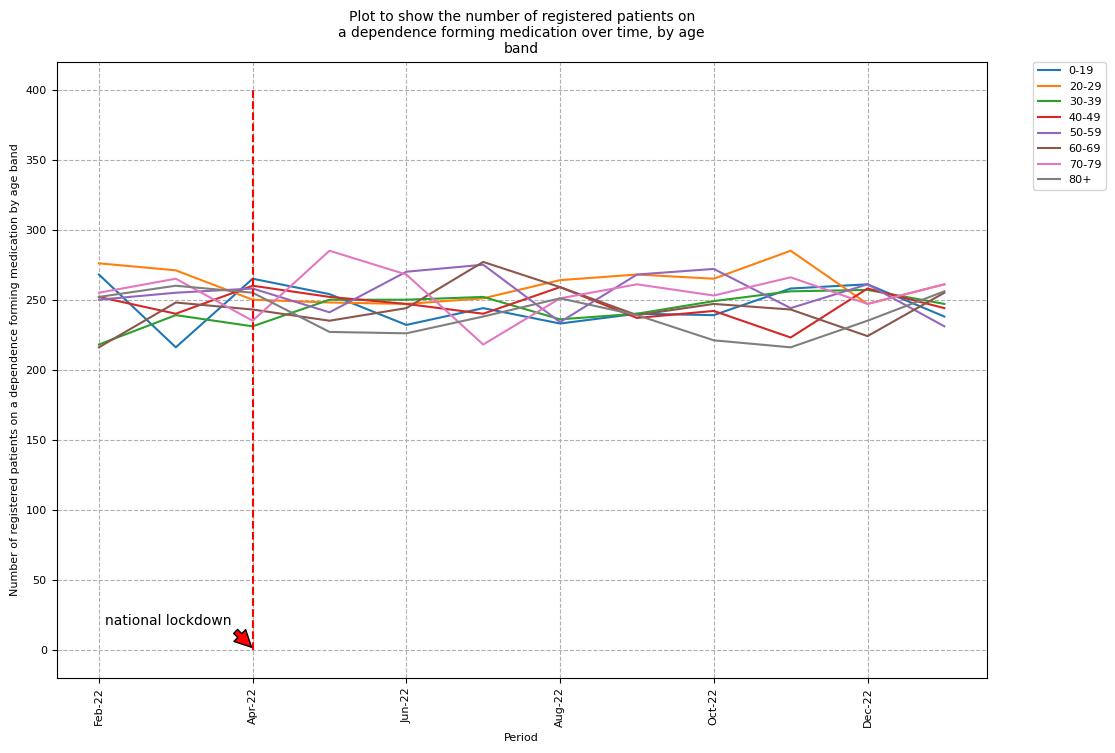

In [22]:
data_measure_dfm_medications_age_rate = pd.read_csv("../output/measure_dfm_medications_by_age_band_rate.csv", parse_dates=["date"])
data_measure_dfm_medications_age_rate = data_measure_dfm_medications_age_rate.loc[data_measure_dfm_medications_age_rate["age_band"] != "missing", :]
df_measure_dfm_medications_age_rate = pd.DataFrame.pivot(data_measure_dfm_medications_age_rate, index='date', columns='age_band', values='research_population')
df_measure_dfm_medications_age_rate.index = pd.to_datetime(df_measure_dfm_medications_age_rate.index).strftime('%b-%y')
ax = df_measure_dfm_medications_age_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by age band', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=600000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_age_band_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()



In [23]:
print(tabulate(df_measure_dfm_medications_age_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_medications_age_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-22     268      276      218      252      250      216      255    252
date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Jan-23     238      261      247      244      231      255      261    256


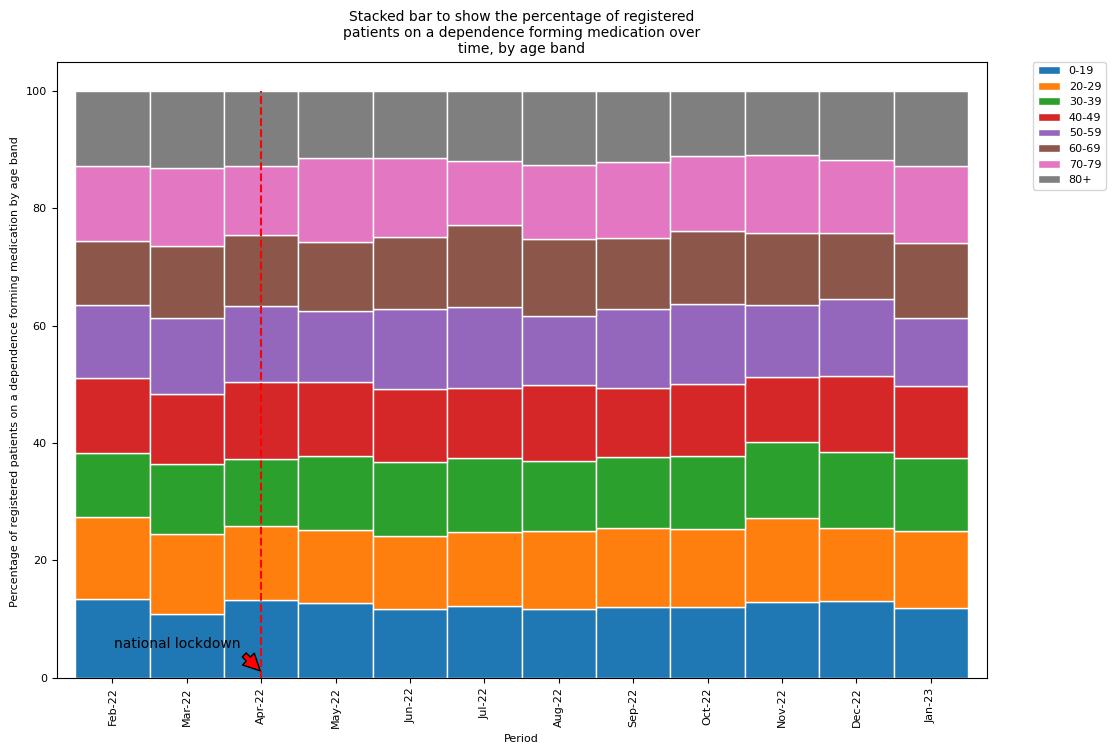

In [24]:
df_age_stacked = pd.DataFrame(df_measure_dfm_medications_age_rate)
df_age_stacked.head()
totam = df_age_stacked.sum(axis=1)
peram = df_age_stacked.div(totam, axis=0).mul(100).round(2)
ax = peram.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by age band ', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_age_band_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [25]:
print(tabulate(peram.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(peram.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-22   13.49    13.89    10.97    12.68    12.58    10.87    12.83  12.68
date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Jan-23   11.94     13.1    12.39    12.24    11.59    12.79     13.1  12.84


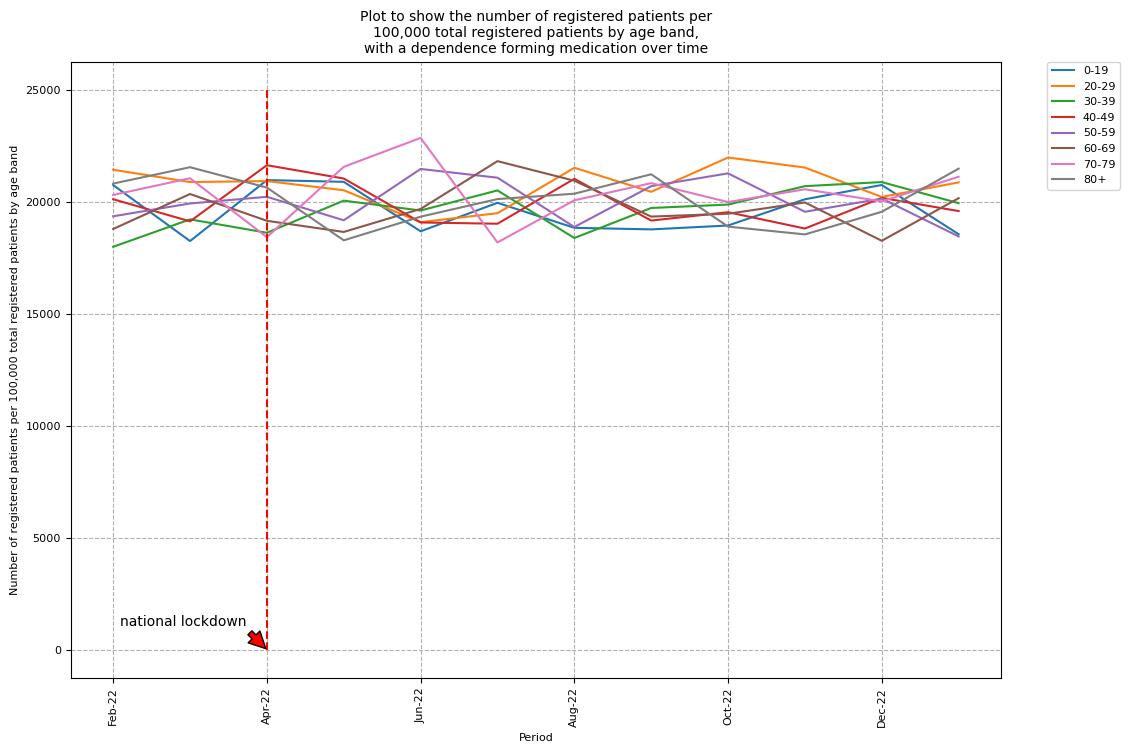

In [26]:
df_temp = pd.DataFrame(data_measure_dfm_medications_age_rate)
df_age_research_population=df_temp.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df_age_research_population = pd.DataFrame.pivot(df_age_research_population, index='date', columns='age_band', values='weighted_research_population')
df_age_research_population.index = pd.to_datetime(df_age_research_population.index).strftime('%b-%y')
ax = df_age_research_population.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by age band', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=300000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients per 100,000 total registered patients by age band, with a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_age_band_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [27]:
print(tabulate(df_age_research_population.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_age_research_population.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
------  ------  -------  -------  -------  -------  -------  -------  -------
Feb-22   20743  21428.6  17986.8  20111.7  19349.8  18782.6  20302.5  20809.2
date       0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
------  -------  -------  -------  -------  -------  -------  -------  -------
Jan-23  18550.3  20863.3  19935.4  19582.7  18450.5  20158.1  21116.5  21476.5


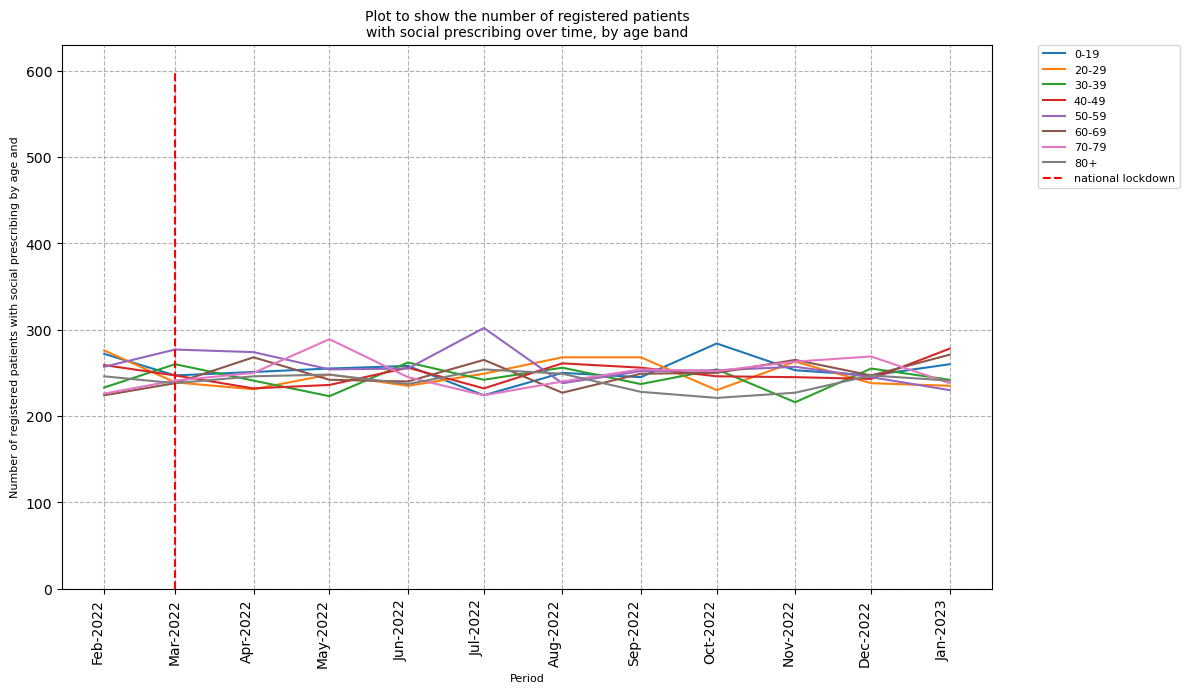

In [40]:
data_measure_social_prescribing_age_rate = pd.read_csv("../output/measure_compare_medications_by_age_band_socialrx_v_consultation_rate.csv", usecols=["date", "age_band", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_social_prescribing_age_rate = data_measure_social_prescribing_age_rate.loc[data_measure_social_prescribing_age_rate["with_social_prescribing"] == 1, :]
data_measure_social_prescribing_age_rate = data_measure_social_prescribing_age_rate.loc[data_measure_social_prescribing_age_rate["age_band"] != "missing", :]
df = pd.DataFrame(data=data_measure_social_prescribing_age_rate)
df2 = df.groupby(['date', 'age_band']).population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients with social prescribing by age and', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=200000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients with social prescribing over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_age_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()


In [ ]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
-------------------  ------  -------  -------  -------  -------  -------  -------  -----
2022-02-01 00:00:00     272      276      233      259      257      224      226    246
date                   0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
-------------------  ------  -------  -------  -------  -------  -------  -------  -----
2023-01-01 00:00:00     260      235      242      278      230      271      238    241


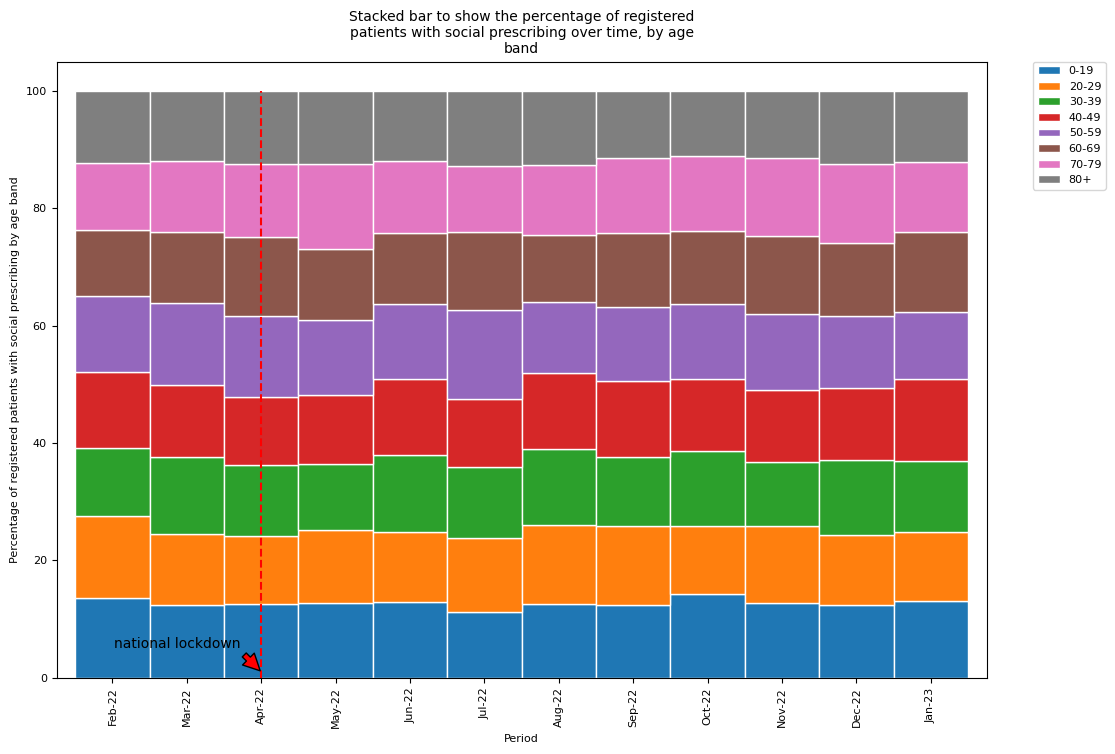

In [ ]:
df_age_social_stacked = pd.DataFrame(df2)
df_age_social_stacked.head()
df_age_social_stacked.index = pd.to_datetime(df_age_social_stacked.index).strftime('%b-%y')
totas = df_age_social_stacked.sum(axis=1)
peras = df_age_social_stacked.div(totas, axis=0).mul(100).round(2)
ax = peras.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients with social prescribing by age band', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients with social prescribing over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_social_prescribing_age_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [ ]:
print(tabulate(peras.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(peras.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-22   13.65    13.85    11.69       13     12.9    11.24    11.34  12.34
date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Jan-23   13.03    11.78    12.13    13.93    11.53    13.58    11.93  12.08


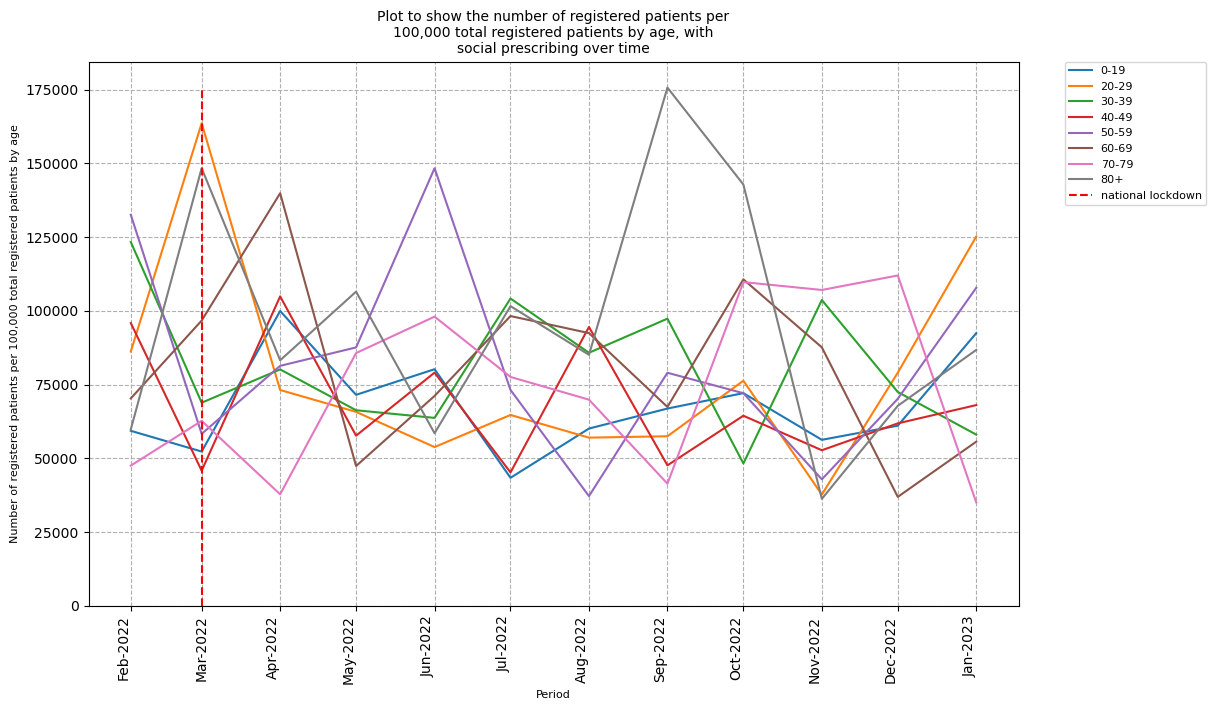

In [43]:
df1 = df.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df2 = df1.groupby(['date', 'age_band']).weighted_research_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by age', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=18000,
        ymax=21000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by age, with social prescribing over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_age_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [ ]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                    0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
-------------------  -------  -------  -------  -------  -------  -------  -------  -------
2022-02-01 00:00:00  59307.1  86192.8   123325  95845.9   132548  70299.8  47509.6  59784.9
date                    0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
-------------------  -------  -------  -------  -------  -------  -------  -------  -------
2023-01-01 00:00:00  92422.7   125195  58016.9  68036.6   107809  55625.2  35037.9  86736.7


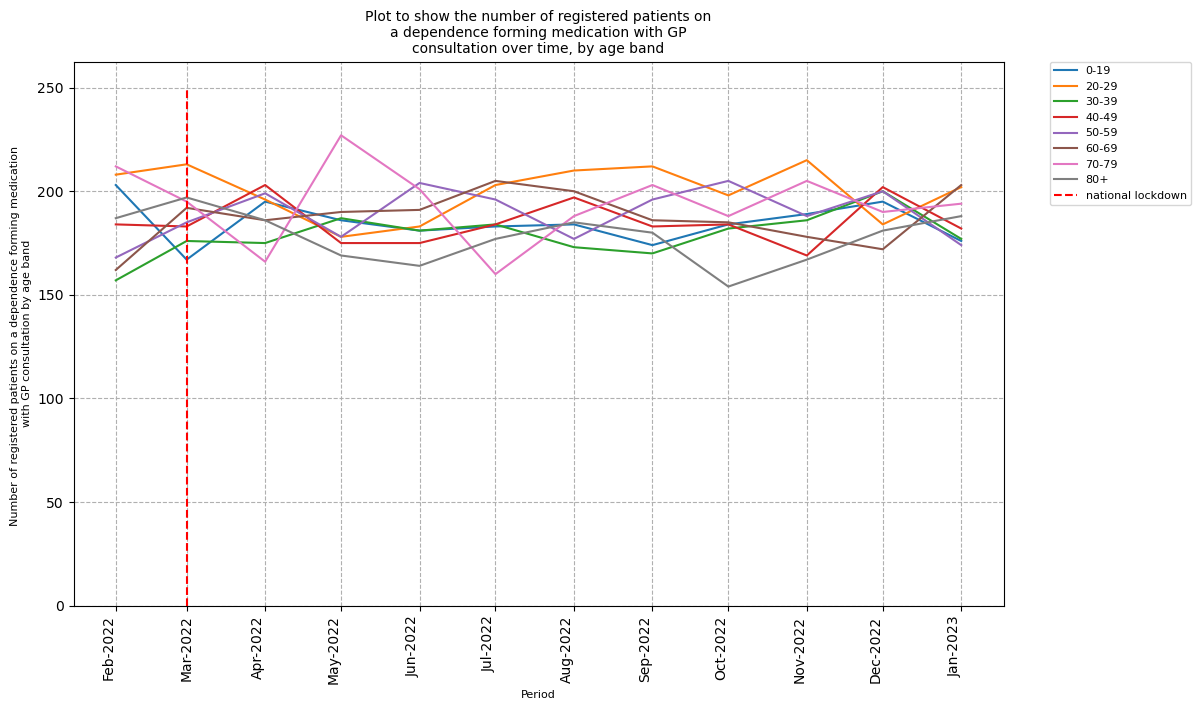

In [46]:
data_measure_consultation_age_rate = pd.read_csv("../output/measure_compare_medications_by_age_band_socialrx_v_consultation_rate.csv", usecols=["date", "age_band", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_consultation_age_rate = data_measure_consultation_age_rate.loc[data_measure_consultation_age_rate["with_consultation"] == 1, :]
data_measure_consultation_age_rate = data_measure_consultation_age_rate.loc[data_measure_consultation_age_rate["age_band"] != "missing", :]
df = pd.DataFrame(data=data_measure_consultation_age_rate)
df2 = df.groupby(['date', 'age_band']).research_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nwith GP consultation by age band', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=90000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients on a dependence forming medication with GP consultation over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_age_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()


In [ ]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
-------------------  ------  -------  -------  -------  -------  -------  -------  -----
2022-02-01 00:00:00     203      208      157      184      168      162      212    187
date                   0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
-------------------  ------  -------  -------  -------  -------  -------  -------  -----
2023-01-01 00:00:00     176      202      177      182      174      203      194    188


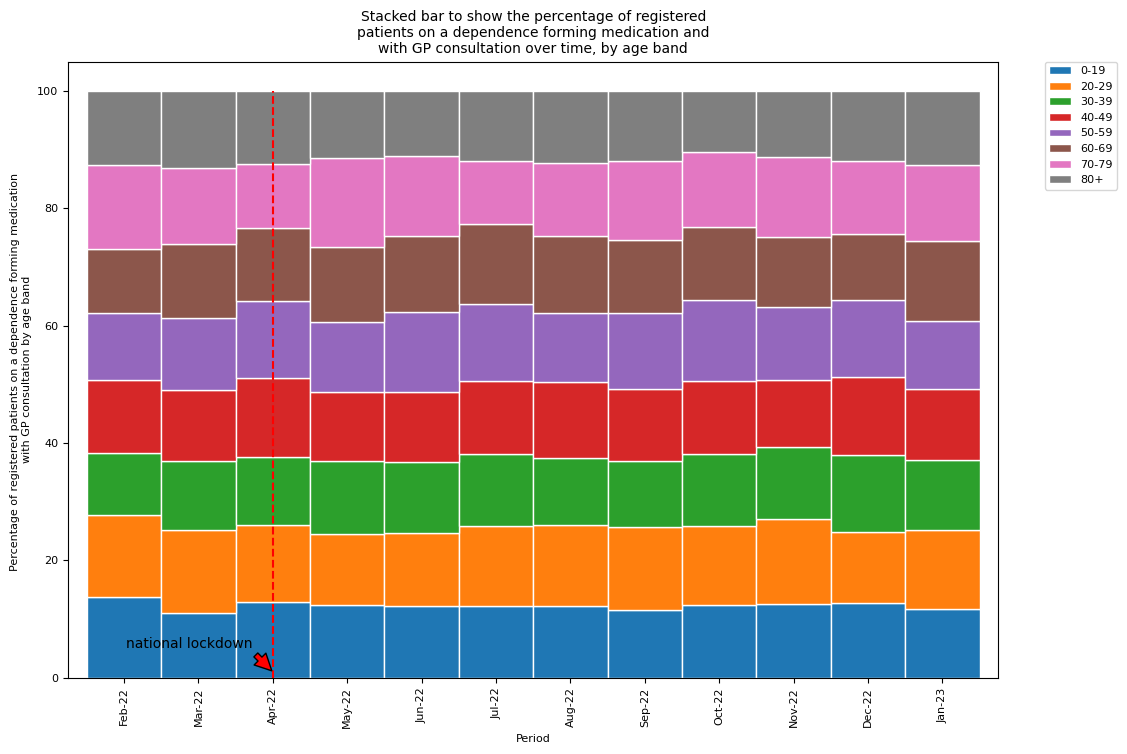

In [ ]:
df_age_consult_stacked = pd.DataFrame(df2)
df_age_consult_stacked.head()
df_age_consult_stacked.index = pd.to_datetime(df_age_consult_stacked.index).strftime('%b-%y')
totac = df_age_consult_stacked.sum(axis=1)
perac = df_age_consult_stacked.div(totac, axis=0).mul(100).round(2)
ax = perac.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication \nwith GP consultation by age band', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication and with GP consultation over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_gp_consultation_age_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [ ]:
print(tabulate(perac.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perac.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-22   13.71    14.04     10.6    12.42    11.34    10.94    14.31  12.63
date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Jan-23   11.76     13.5    11.83    12.17    11.63    13.57    12.97  12.57


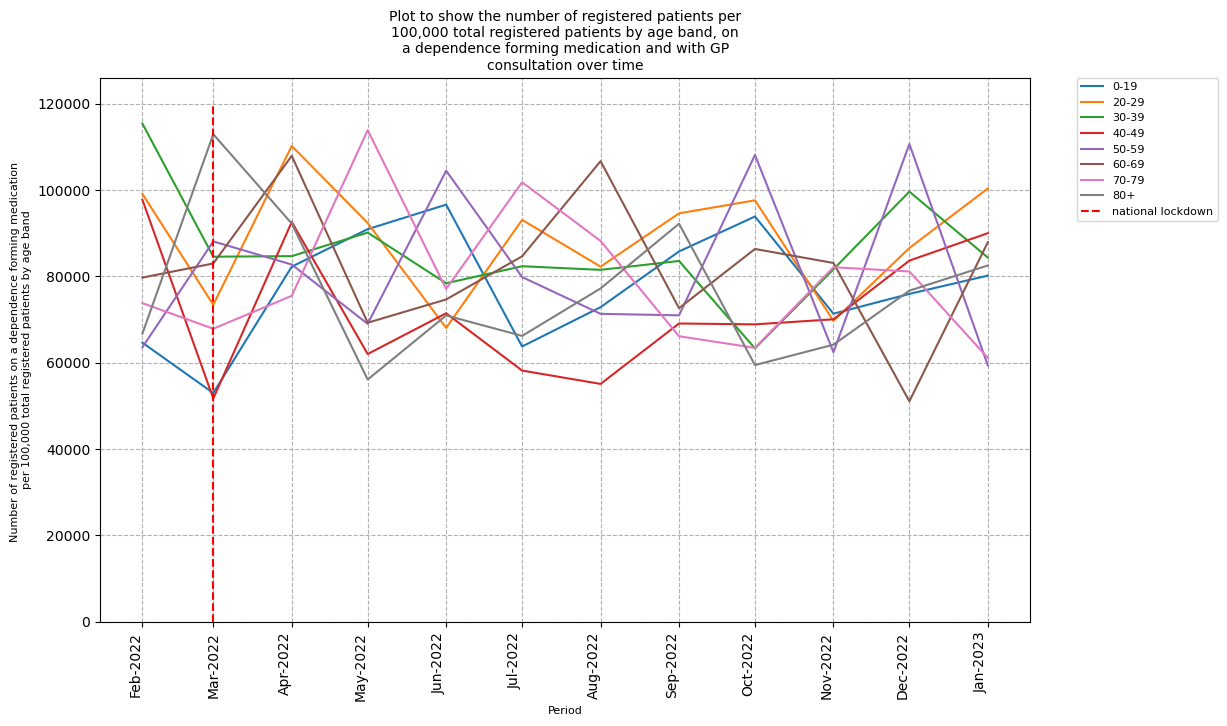

In [49]:
df1 = df.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df2 = df1.groupby(['date', 'age_band']).weighted_research_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nper 100,000 total registered patients by age band', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=18000,
        ymax=21000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by age band, on a dependence forming medication and with GP consultation over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_age_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [ ]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
-------------------  ------  -------  -------  -------  -------  -------  -------  -------
2022-02-01 00:00:00   64634  99095.7   115381  97740.2  63572.8  79704.2  73794.8  66724.2
date                    0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
-------------------  -------  -------  -------  -------  -------  -------  -------  -------
2023-01-01 00:00:00  80171.8   100354  84341.8  89994.5    59363  87907.3  61106.9  82524.8
